In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
x_train[0].min()

0

In [8]:
x_train, x_test = x_train/255, x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train, y_cat_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [12]:
help(to_categorical)

Help on function to_categorical in module tensorflow.python.keras.utils.np_utils:

to_categorical(y, num_classes=None, dtype='float32')
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    Arguments:
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input. Default: `'float32'`.
    
    Returns:
        A binary matrix representation of the input. The classes axis is placed
        last.



In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=34, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 34)        17442     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 34)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 850)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               217856    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [31]:
model.fit(x_train, y_cat_train, epochs=15,
          validation_data=(x_test, y_cat_test),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.5224 - accuracy: 0.4476 - val_loss: 1.2715 - val_accuracy: 0.5403
Epoch 2/15
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.1917 - accuracy: 0.5772 - val_loss: 1.1634 - val_accuracy: 0.5849
Epoch 3/15
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.0419 - accuracy: 0.6337 - val_loss: 1.0612 - val_accuracy: 0.6267
Epoch 4/15
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.9357 - accuracy: 0.6737 - val_loss: 1.0021 - val_accuracy: 0.6552
Epoch 5/15
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.8442 - accuracy: 0.7042 - val_loss: 0.9547 - val_accuracy: 0.6743
Epoch 6/15
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.7724 - accuracy: 0.7313 - val_loss: 0.9866 - val_accuracy: 0.6626
Epoch 7/15
50000/50000 [==============================] 

In [32]:
metrics = pd.DataFrame(model.history.history)

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.522445,0.44762,1.271505,0.5403
1,1.191691,0.57720,1.163385,0.5849
2,1.041906,0.63372,1.061195,0.6267
3,0.935673,0.67370,1.002099,0.6552
4,0.844191,0.70418,0.954730,0.6743
5,0.772395,0.73126,0.986640,0.6626
6,0.702254,0.75534,1.020309,0.6637


In [34]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [35]:
metrics[['loss', 'accuracy', 'val_loss', 'val_accuracy']]

,loss,accuracy,val_loss,val_accuracy
0,1.522445,0.44762,1.271505,0.5403
1,1.191691,0.57720,1.163385,0.5849
2,1.041906,0.63372,1.061195,0.6267
3,0.935673,0.67370,1.002099,0.6552
4,0.844191,0.70418,0.954730,0.6743
5,0.772395,0.73126,0.986640,0.6626
6,0.702254,0.75534,1.020309,0.6637


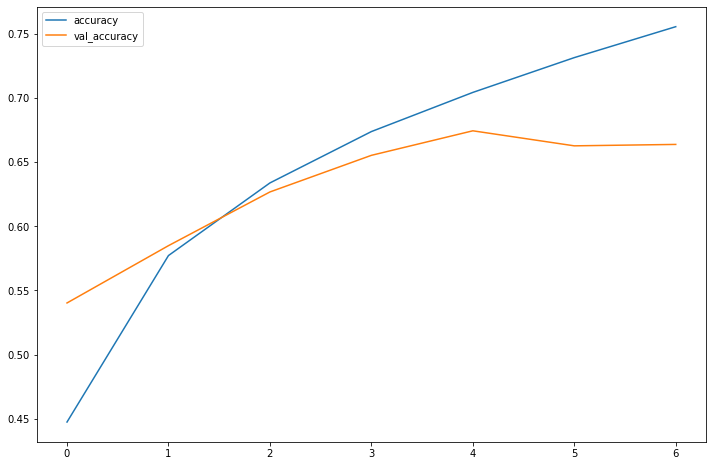

In [36]:
metrics[['accuracy', 'val_accuracy']].plot()

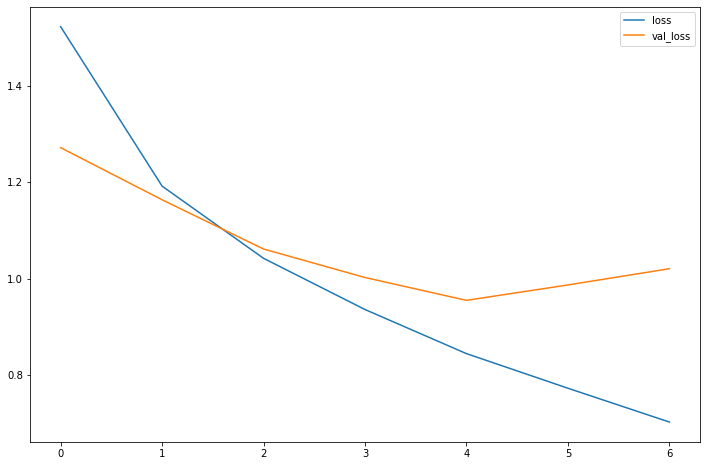

In [37]:
metrics[['loss','val_loss']].plot()

In [40]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.020308539390564, 0.6637]

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
predictions = model.predict_classes(x_test)

In [44]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.82      0.74      0.78      1000
           2       0.46      0.65      0.54      1000
           3       0.57      0.32      0.41      1000
           4       0.57      0.71      0.63      1000
           5       0.68      0.40      0.50      1000
           6       0.66      0.81      0.73      1000
           7       0.81      0.70      0.75      1000
           8       0.72      0.81      0.76      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [47]:
import seaborn as sns
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

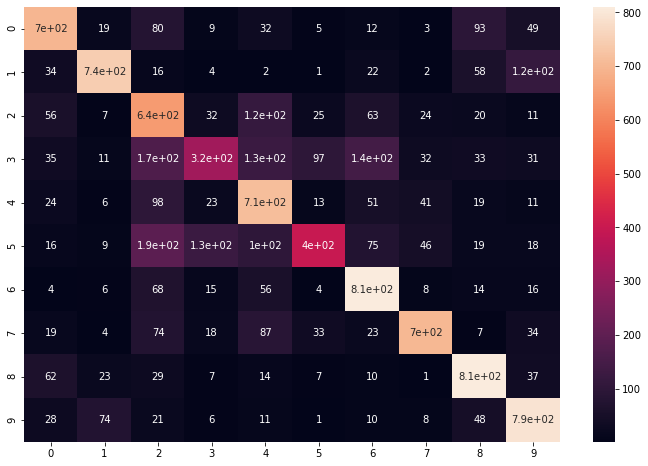

In [50]:
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [51]:
test_image = x_test[0]

In [52]:
test_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

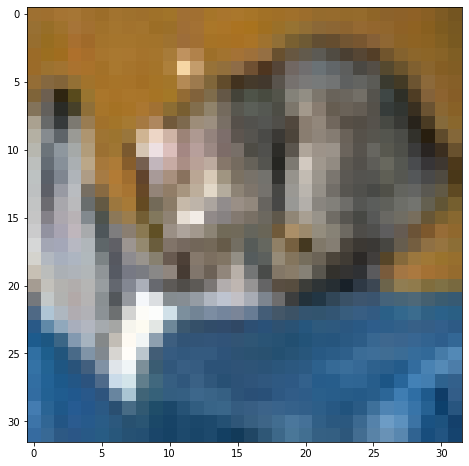

In [53]:
plt.imshow(test_image)

In [56]:
res = model.predict_classes(test_image.reshape(1,32,32,3))[0]
res

2

In [63]:
lables = { 0 : "airplane",
           1 : "automobile",
           2  : "bird",
           3 : "cat",
           4 : "deer",
           5 : "dog",
           6 : "frog",
           7 : "horse",
           8 : "ship",
           9 : "truck"
 }


In [64]:
lables.get(res)

'bird'